In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as mpatches


In [3]:
plt.style.use('ggplot')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.rcParams["figure.figsize"] = [15,10]

In [4]:
gray = cv2.imread("img_seleccionadas/0.png",0)

In [5]:
gray = cv2.resize(gray,(1024,1024), interpolation = cv2.INTER_CUBIC)

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


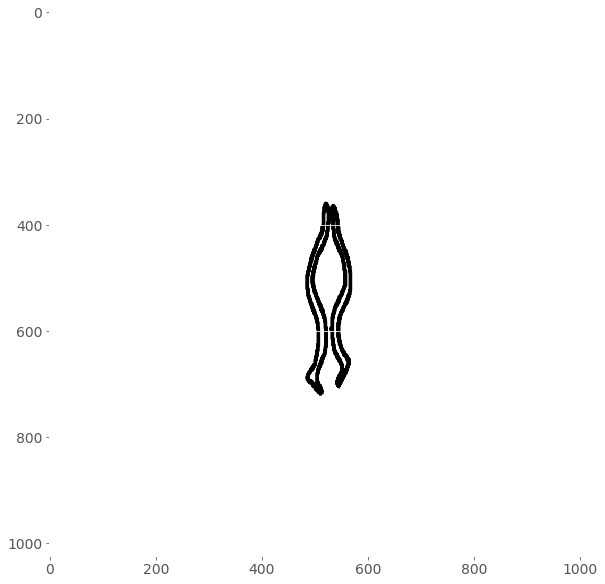

In [6]:
plt.imshow(gray,cmap='gray')
plt.show()

In [ ]:
np.shape(coord_select)

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


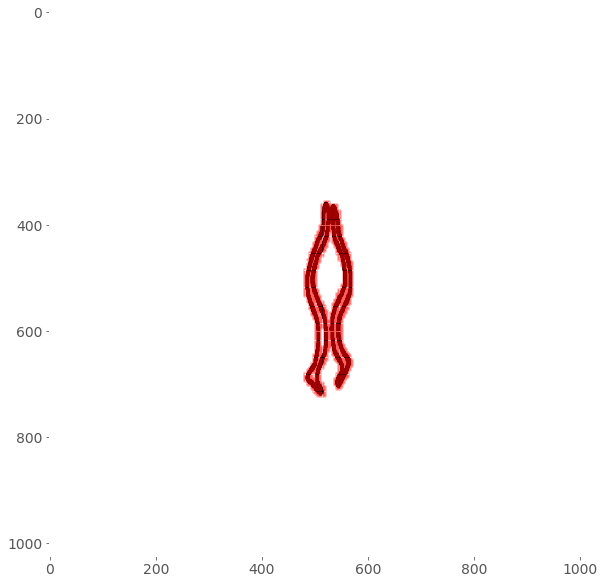

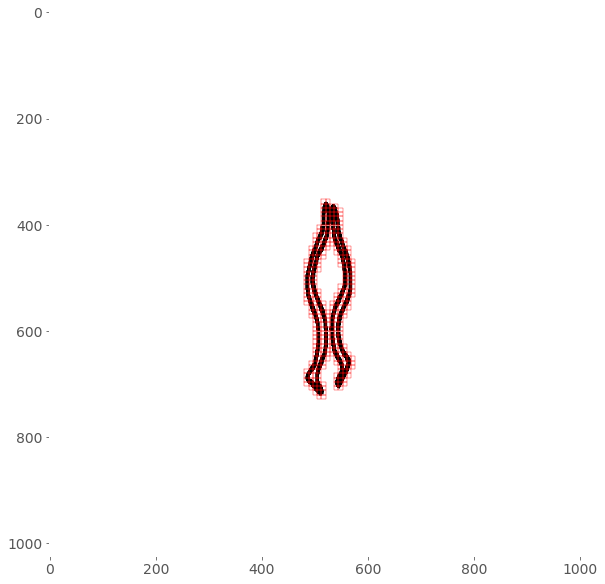

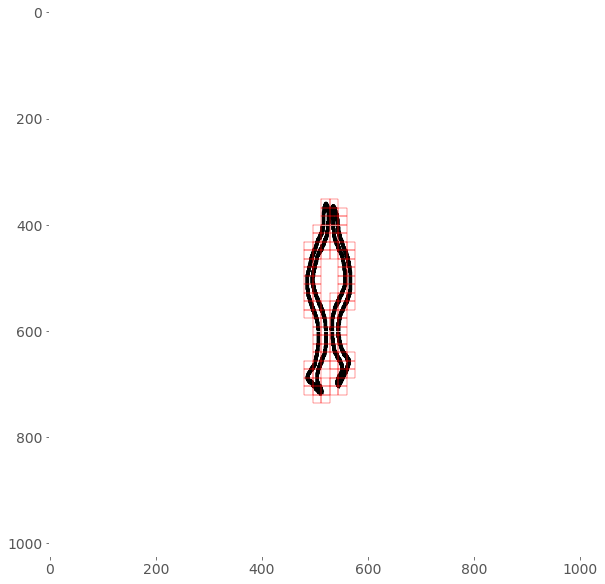

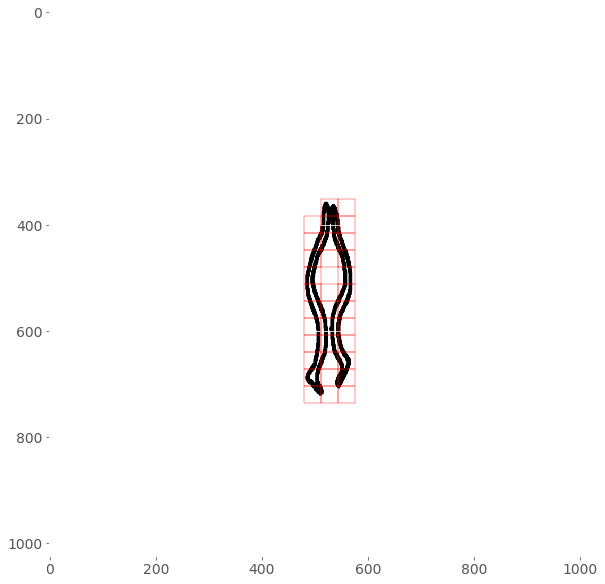

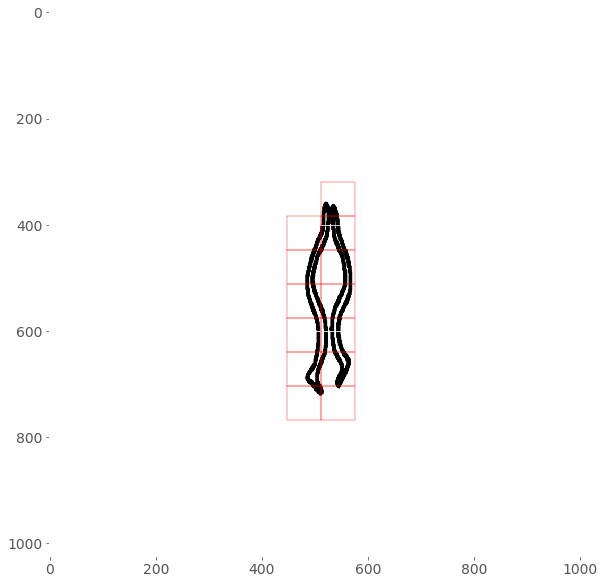

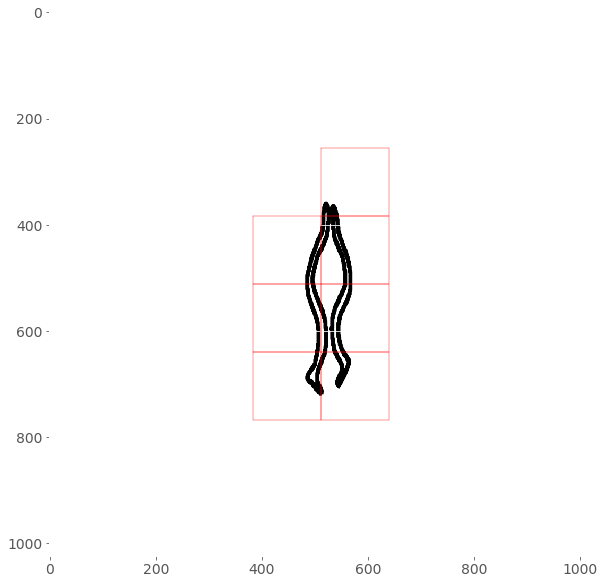

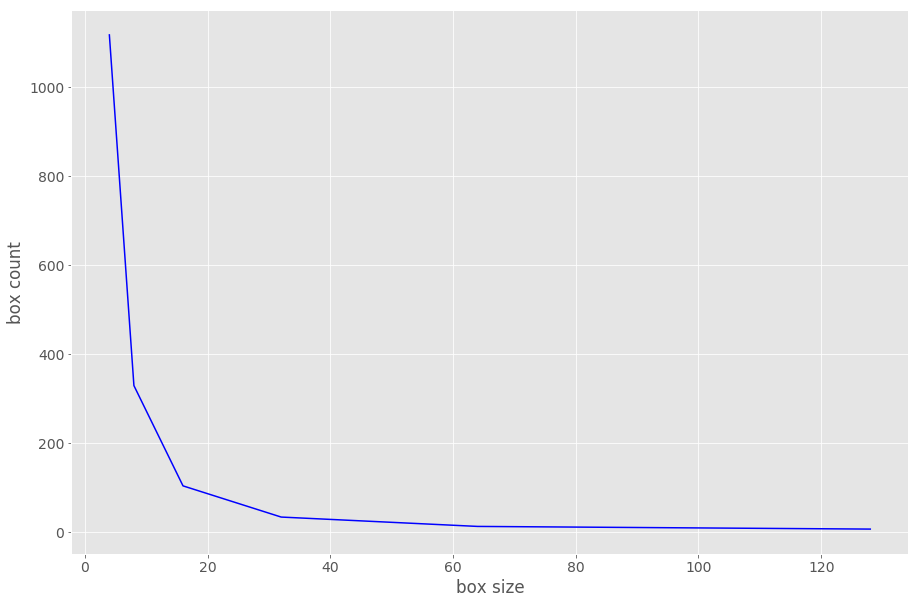

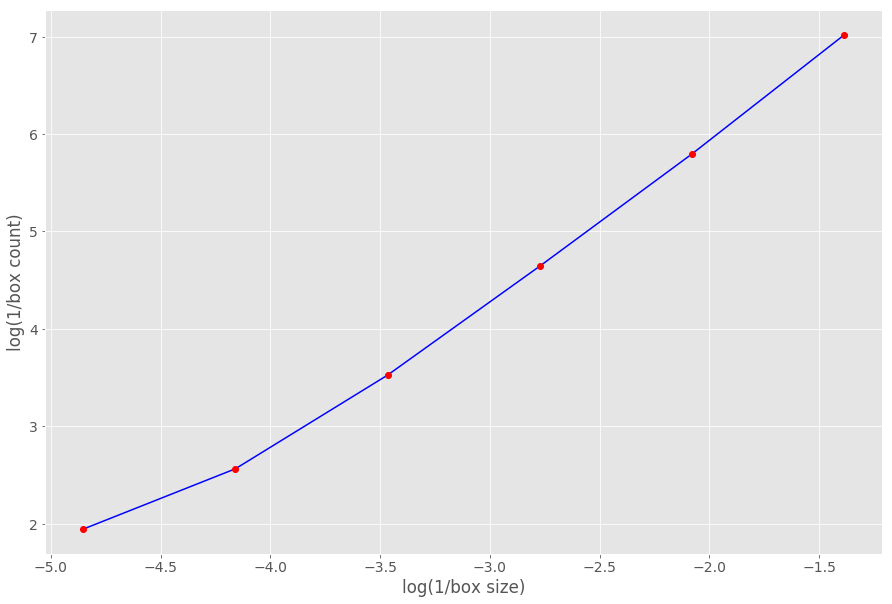

In [8]:
calc=[]
for t in 2**np.array((range(2,8))):
    r = gray.shape[0] // t
    n = r*r
    x = 0
    y = 0
    
    frag_select = []
    coord_select = []
    for i in range(r):
        for j in range(r):
            if ((gray[x:x+t, y:y+t].mean() != 255)):
                #print(gray[x:x+t, y:y+t].mean())
                coord_select.append([[y,y,y+t,y+t,y],[x,x+t,x+t,x,x]])
                frag_select.append(gray[x:x+t, y:y+t])    
            y = y + t
        x = x + t
        y = 0
    a = plt.imshow(gray,cmap='gray')
    #plt.plot(np.array(coord_select)[0,0],np.array(coord_select)[0,1],'r.')
    for i in range(np.shape(coord_select)[0]):
        plt.plot(np.array(coord_select)[i,0],np.array(coord_select)[i,1],'r-',lw=0.4)
    #currentAxis.add_patch(Rectangle((0 - 0.1, 0 - 0.1), 0.2, 0.2, alpha=1, facecolor='blue'))
    plt.show()
    calc.append([t,np.shape(coord_select)[0]])
calc = np.array(calc)
plt.plot(calc[:,0],calc[:,1],'-b')
plt.xlabel("box size")
plt.ylabel("box count")
plt.show()
calc_log = np.array(list(map(lambda x: [math.log(1/x[0]),math.log(x[1])] ,calc)))
plt.plot(calc_log[:,0],calc_log[:,1],'-b')
plt.plot(calc_log[:,0],calc_log[:,1],'or')
plt.xlabel("log(1/box size)")
plt.ylabel("log(1/box count)")
plt.show()